In [2]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Conv2D, MaxPooling2D, Flatten
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tqdm import trange, notebook
from livelossplot import PlotLossesKeras



In [4]:
data_path = 'D:/AI_Alignment/data'

In [5]:
def load_data(data_path, num_samples):
    wavefront_maps = []
    errors = []


    for i in range(1, num_samples + 1):
        folder_path = os.path.join(data_path, f'data{i}')
        wfm_data = []

        for j in range(1, 6):
            file_path = os.path.join(folder_path, f'wfm_{j}.txt')
            with open(file_path, 'r', encoding='utf-16') as f:
                lines = f.readlines()[16:]  # 17번째 줄부터 데이터를 읽어옵니다
                data = np.array([list(map(float, line.split())) for line in lines])
                wfm_data.append(data)
                
        wfm_data = np.array(wfm_data).reshape(5, 64, 64, 1)
        wavefront_maps.append(wfm_data)
        
        
        
        error_file_path = os.path.join(folder_path, 'error.txt')
        error_data = np.loadtxt(error_file_path)
        errors.append(error_data)

        

    return np.array(wavefront_maps), np.array(errors)

In [6]:
num_samples = 10000
X, y = load_data(data_path,num_samples)

In [7]:
len(y)

10000

In [17]:
indices=range(num_samples)

In [7]:
scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, 64*64)
X_scaled = scaler.fit_transform(X_reshaped).reshape(-1, 5, 64, 64, 1)


In [69]:
X_scaled[2][3][4][30]

array([0.68048366])

In [70]:
X[2][3][4][30]

array([6.983954])

In [81]:
X_scaled.shape

(10000, 5, 64, 64, 1)

In [18]:
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X_scaled, y, indices, test_size=0.2, random_state=42)

## Conv3D

In [19]:
from tensorflow.keras.layers import Conv3D, MaxPooling2D, Flatten, Dense, Activation
model = Sequential()
inputShape = (5, 64,64, 1)
  


model.add(Conv3D(32, (3, 3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
   # model.add(MaxPooling3D(pool_size=(2, 2, 2), padding="same", data_format="channels_last"))
    #model.add(Dropout(0.25))
'''
model.add(Conv3D(64, (3, 3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding="same", data_format="channels_last"))
model.add(Dropout(0.25))
'''
model.add(Flatten())
   
model.add(Dense(128))    #(Dense(1024))
model.add(Activation("relu"))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.5))
'''
# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax")
'''
model.add(Dense(6,activation='linear'))
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1 (Conv3D)           (None, 5, 64, 64, 32)     896       
                                                                 
 activation_2 (Activation)   (None, 5, 64, 64, 32)     0         
                                                                 
 flatten_1 (Flatten)         (None, 655360)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               83886208  
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 83887878 (320.01 MB)
Trainable params: 8

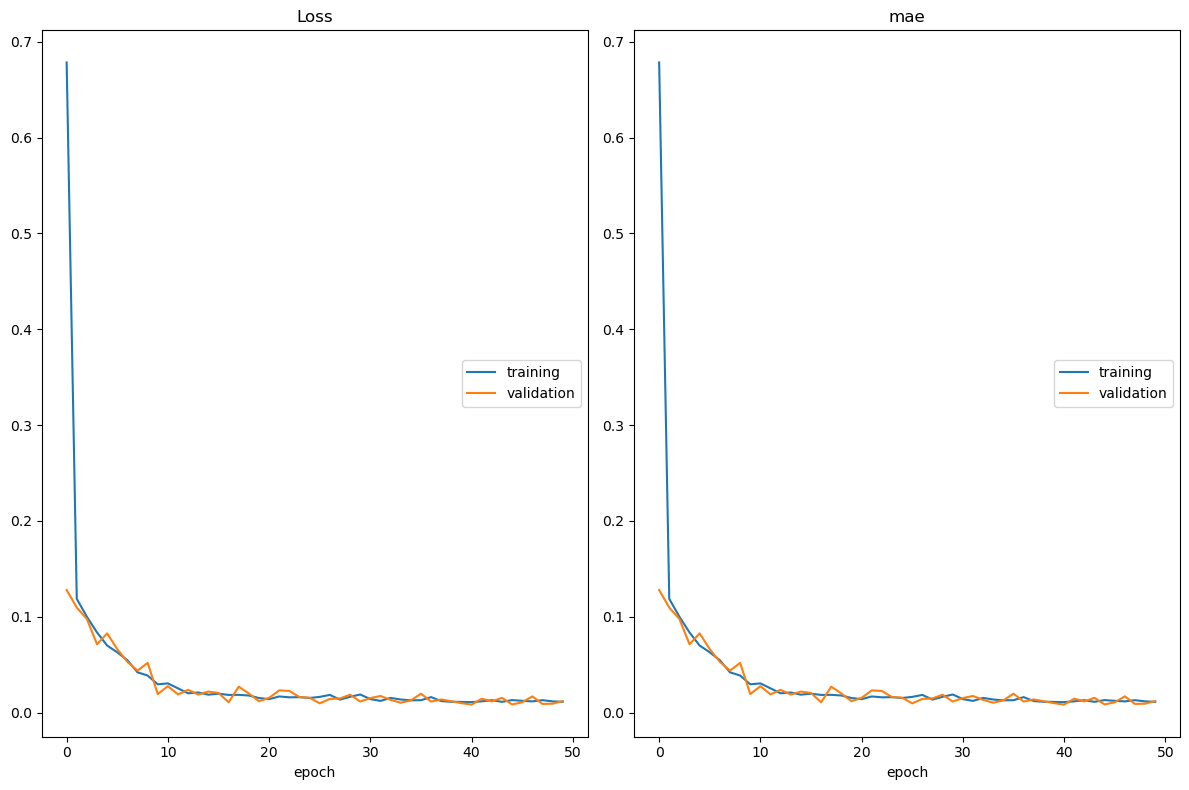

Loss
	training         	 (min:    0.011, max:    0.679, cur:    0.011)
	validation       	 (min:    0.008, max:    0.128, cur:    0.012)
mae
	training         	 (min:    0.011, max:    0.679, cur:    0.011)
	validation       	 (min:    0.008, max:    0.128, cur:    0.012)
100/100 [==============================] - 83s 827ms/step - loss: 0.0113 - mae: 0.0113 - val_loss: 0.0120 - val_mae: 0.0120


In [20]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [ ]:
X_scaled[2][3][4][30]

array([0.68048366])

## 모델 평가

In [21]:
model_eval = model.evaluate(X_test, y_test)

print(f'Model MAE :{model_eval[1]}')

63/63 [==============================] - 4s 69ms/step - loss: 0.0121 - mae: 0.0121
Model MAE :0.012065042741596699


In [22]:
model_predic = model.predict(X_test)

63/63 [==============================] - 4s 68ms/step


In [23]:
for i in range(5):
    print(f'Sample {i+1}:')
    print(f'Actual Errors: {y_test[i]}')
    print(f'Predicted Errors: {model_predic[i]}')
    print()

Sample 1:
Actual Errors: [ 0.407  0.19  -0.412  0.243  0.279 -0.059]
Predicted Errors: [ 0.35261497  0.17366995 -0.41205734  0.25555113  0.27833894 -0.04318536]

Sample 2:
Actual Errors: [ 0.389  0.212 -0.211  0.085  0.086  0.072]
Predicted Errors: [ 0.3665511   0.22652504 -0.22032881  0.08525335  0.0863072   0.08486457]

Sample 3:
Actual Errors: [ 0.038  0.274  0.125 -0.087 -0.036 -0.284]
Predicted Errors: [ 0.00634141  0.26505813  0.12436195 -0.08396532 -0.03918992 -0.27599993]

Sample 4:
Actual Errors: [-0.049  0.318 -0.049  0.211  0.231 -0.111]
Predicted Errors: [-0.07895956  0.30754247 -0.04982041  0.21850584  0.2325017  -0.10030662]

Sample 5:
Actual Errors: [-0.404  0.446  0.45   0.118 -0.105  0.055]
Predicted Errors: [-0.4232402   0.43769404  0.45882598  0.13114154 -0.1083733   0.05829734]



## 결과저장

In [25]:
test_indices

[6252,
 4684,
 1731,
 4742,
 4521,
 6340,
 576,
 5202,
 6363,
 439,
 2750,
 7487,
 5272,
 5653,
 3999,
 6033,
 582,
 9930,
 7051,
 8158,
 9896,
 2249,
 4640,
 9485,
 4947,
 9920,
 1963,
 8243,
 6590,
 8847,
 321,
 2678,
 4625,
 4949,
 8328,
 3337,
 5589,
 251,
 3973,
 6630,
 5547,
 35,
 8362,
 1513,
 9317,
 39,
 4819,
 3465,
 1760,
 2304,
 3723,
 8284,
 4993,
 8127,
 3032,
 7938,
 3039,
 9655,
 2545,
 2592,
 1188,
 7966,
 6077,
 107,
 1315,
 8187,
 2753,
 9753,
 6231,
 2876,
 5323,
 799,
 3570,
 2894,
 2927,
 8178,
 971,
 6687,
 8575,
 2020,
 9054,
 952,
 5359,
 3857,
 5861,
 3145,
 3305,
 3006,
 9001,
 7770,
 7438,
 7942,
 9238,
 1056,
 3154,
 3787,
 9189,
 7825,
 7539,
 7231,
 764,
 5019,
 4903,
 8093,
 6843,
 2165,
 1862,
 7850,
 9123,
 2340,
 5527,
 6743,
 4003,
 1123,
 8709,
 4049,
 7640,
 765,
 2344,
 4071,
 7216,
 4216,
 7952,
 5970,
 3350,
 4695,
 3399,
 4081,
 9149,
 1224,
 6292,
 3122,
 510,
 5794,
 8181,
 9417,
 96,
 6681,
 1512,
 8791,
 119,
 7791,
 6517,
 33,
 7887,
 6830,

In [26]:
predicted_file_number = []
for i in range(len(test_indices)) :
    a = test_indices[i] + 1
    b = str(a)
    predicted_file_number.append(b)

In [27]:
predicted_file_number

['6253',
 '4685',
 '1732',
 '4743',
 '4522',
 '6341',
 '577',
 '5203',
 '6364',
 '440',
 '2751',
 '7488',
 '5273',
 '5654',
 '4000',
 '6034',
 '583',
 '9931',
 '7052',
 '8159',
 '9897',
 '2250',
 '4641',
 '9486',
 '4948',
 '9921',
 '1964',
 '8244',
 '6591',
 '8848',
 '322',
 '2679',
 '4626',
 '4950',
 '8329',
 '3338',
 '5590',
 '252',
 '3974',
 '6631',
 '5548',
 '36',
 '8363',
 '1514',
 '9318',
 '40',
 '4820',
 '3466',
 '1761',
 '2305',
 '3724',
 '8285',
 '4994',
 '8128',
 '3033',
 '7939',
 '3040',
 '9656',
 '2546',
 '2593',
 '1189',
 '7967',
 '6078',
 '108',
 '1316',
 '8188',
 '2754',
 '9754',
 '6232',
 '2877',
 '5324',
 '800',
 '3571',
 '2895',
 '2928',
 '8179',
 '972',
 '6688',
 '8576',
 '2021',
 '9055',
 '953',
 '5360',
 '3858',
 '5862',
 '3146',
 '3306',
 '3007',
 '9002',
 '7771',
 '7439',
 '7943',
 '9239',
 '1057',
 '3155',
 '3788',
 '9190',
 '7826',
 '7540',
 '7232',
 '765',
 '5020',
 '4904',
 '8094',
 '6844',
 '2166',
 '1863',
 '7851',
 '9124',
 '2341',
 '5528',
 '6744',
 '4004

In [29]:
with open('D:/AI_Alignment/data/predicted_file_number.txt','w') as file :
    for i in predicted_file_number :
        file.write(i+'\n')


In [33]:
a = list(model_predic[0])
a

[0.35261497, 0.17366995, -0.41205734, 0.25555113, 0.27833894, -0.04318536]

In [36]:
for i in range(len(predicted_file_number)) :
    file_path = 'D:/AI_Alignment/data/data' + predicted_file_number[i] + '/predicted_error.txt'
    error = list(model_predic[i])
    with open(file_path,'w') as f :
        for item in error :
            f.write(str(item) + '\n')